# EDA 5번) 대구의 지형 특성 (분지) 분석
* 대구와 **비슷한**  지역 기후 탐색
* HI(열 지수)를 체감 온도로 보고 진행
* 폭염 기준 : 주의보 체감 온도 33℃ 이상 / 경보 35℃ 이상
* 체감 온도: 기온에 습도, 바람 등의 영향이 더해져 사람이 느끼는 더위나 추위를 정량적으로 나타낸 온도
* 습도 10% 증가 시마다 체감온도 1도 가량 증가하는 특징

# 참조자료
* 열섬현상 설명 : https://m.blog.naver.com/kma_131/220392671501
* 지도 표현 : https://dailyheumsi.tistory.com/144
* Folium 설명 : https://python-visualization.github.io/folium/quickstart.html#Getting-Started
* 낮의 기온은 도심이나 시골 지역이나 큰 차이가 나지 않음
* 오히려 밤에 온도 차이가 많이 발생하여 열섬을 확인하기 더 뚜렷함
* 시간대를 19:00 ~ 06:00 까지 제한시킨 상태에서 진행해야 할듯 (05.13 메모)

In [24]:
# 기본 모듈 선언
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [25]:
# 각 도시 데이터 호출

df_daegu = pd.read_csv("output/Daegu_final.csv")
df_daejeon = pd.read_csv("output/Daejeon_final.csv")
df_cheongju = pd.read_csv("output/Cheongju_final.csv")
df_chuncheon = pd.read_csv("output/Chuncheon_final.csv")

# 대구

In [26]:
# 첫 호출 테스트
df_daegu

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


### 칼럼 재조정 및 날짜 보정
* unique 함수 사용을 위해 datetime에 있는 시간 부분을 제거하고 작업
* (05.16 추가) 시간을 떼지 말고 별도의 칼럼을 하나 더 만들어서 작업 = 기존 시간 부분 떼지 말고 진행

In [27]:
# Year-Month-Day의 YMD 칼럼 생성
daegu = df_daegu[['region','year','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]
daegu['ymd'] = daegu['datetime'].str.split(' ').str[0]
daegu['time'] = daegu['datetime'].str.split(' ').str[1]
daegu = daegu[['region','datetime','year','ymd','time','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]

C:\Users\JW\AppData\Local\Temp\ipykernel_11624\921002645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daegu['ymd'] = daegu['datetime'].str.split(' ').str[0]
C:\Users\JW\AppData\Local\Temp\ipykernel_11624\921002645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daegu['time'] = daegu['datetime'].str.split(' ').str[1]


* 조건에 맞는 결과값을 뽑아서 따로 저장 후
* 해당 기간에 대한 고유값만 모아서 저장
* 그 후 각 리스트에 모여진 (수치들의 합 / 리스트 크기) 값을 평균 폭염 발생일로 지정 

In [28]:
daegu_result = []

for i in range(2010,2023):
    daegu_sample = daegu[(daegu['year'] == i) & (daegu['HI'] >= 35) & (daegu['DI'] >= 80)]
    daegu_result.append(len(daegu_sample['ymd'].unique()))

print("대구 지역 매년 폭염 발생일 수" )
print(daegu_result)

sum = 0
for i in range(len(daegu_result)):
    sum += daegu_result[i]

daegu_mean = sum / len(daegu_result)


print("대구 지역 폭염 발생일 평균 : ",round(daegu_mean,2))

대구 지역 매년 폭염 발생일 수
[63, 53, 40, 54, 24, 26, 45, 53, 53, 39, 44, 39, 0]
대구 지역 폭염 발생일 평균 :  41.0


## 열대야 / 열섬 분석
* 열섬 현상은 낮보다 밤에 더 뚜렷하게 나타남
* 측정 시간은 매 시 정각이므로 시간대를 20 ~ 05 시까지 제한하고 진행

In [29]:
# 시간대 조정
heat_daegu = daegu[(daegu['time'] >= '20:00:00') | (daegu['time'] <= '05:00:00')]

In [30]:
heat_result = []

for i in range(2010,2023):
    daegu_sample = heat_daegu[(heat_daegu['year'] == i) & (heat_daegu['HI'] >= 35) & (heat_daegu['DI'] >= 80)]
    heat_result.append(len(daegu_sample['ymd'].unique()))

print("대구 지역 매년 열대야 발생일 수" )
print(heat_result)

sum = 0
for i in range(len(heat_result)):
    sum += heat_result[i]

daegu_mean = sum / len(heat_result)


print("대구 지역 열대야 발생일 평균 : ",round(daegu_mean,2))

대구 지역 매년 열대야 발생일 수
[55, 48, 37, 51, 19, 24, 41, 52, 53, 37, 42, 37, 0]
대구 지역 열대야 발생일 평균 :  38.15


# 대전
* 위의 대구와 같은 작업이므로 자세한 설명 생략

In [31]:
# Year-Month-Day의 YMD 칼럼 생성
daejeon = df_daejeon[['region','year','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]
daejeon['ymd'] = daejeon['datetime'].str.split(' ').str[0]
daejeon['time'] = daejeon['datetime'].str.split(' ').str[1]
daejeon = daejeon[['region','datetime','year','ymd','time','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]

C:\Users\JW\AppData\Local\Temp\ipykernel_11624\2915251781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daejeon['ymd'] = daejeon['datetime'].str.split(' ').str[0]
C:\Users\JW\AppData\Local\Temp\ipykernel_11624\2915251781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daejeon['time'] = daejeon['datetime'].str.split(' ').str[1]


In [32]:
daejeon_result = []

for i in range(2010,2023):
    daejeon_sample = daejeon[(daejeon['year'] == i) & (daejeon['HI'] >= 35) & (daejeon['DI'] >= 80)]
    daejeon_result.append(len(daejeon_sample['ymd'].unique()))

print("대전 지역 매년 폭염 발생일 수" )
print(daejeon_result)

sum = 0
for i in range(len(daejeon_result)):
    sum += daejeon_result[i]

daejeon_mean = sum / len(daejeon_result)


print("대전 지역 폭염 발생일 평균 : ",round(daejeon_mean,2))

대전 지역 매년 폭염 발생일 수
[51, 37, 38, 56, 20, 23, 40, 53, 54, 30, 34, 35, 0]
대전 지역 폭염 발생일 평균 :  36.23


In [33]:
# 시간대 조정
heat_daejeon = daejeon[(daejeon['time'] >= '20:00:00') | (daejeon['time'] <= '05:00:00')]

heat_result = []

for i in range(2010,2023):
    daejeon_sample = heat_daejeon[(heat_daejeon['year'] == i) & (heat_daejeon['HI'] >= 35) & (heat_daejeon['DI'] >= 80)]
    heat_result.append(len(daejeon_sample['ymd'].unique()))

print("대전 지역 매년 열대야 발생일 수" )
print(heat_result)

sum = 0
for i in range(len(heat_result)):
    sum += heat_result[i]

heat_mean = sum / len(heat_result)


print("대전 지역 열대야 발생일 평균 : ",round(heat_mean,2))

대전 지역 매년 열대야 발생일 수
[46, 36, 35, 50, 16, 20, 38, 51, 52, 30, 34, 35, 0]
대전 지역 열대야 발생일 평균 :  34.08


# 청주
* 위의 대구와 같은 작업이므로 자세한 설명 생략

In [34]:
# Year-Month-Day의 YMD 칼럼 생성
cheongju = df_cheongju[['region','year','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]
cheongju['ymd'] =cheongju['datetime'].str.split(' ').str[0]
cheongju['time'] = cheongju['datetime'].str.split(' ').str[1]
cheongju = cheongju[['region','datetime','year','ymd','time','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]

C:\Users\JW\AppData\Local\Temp\ipykernel_11624\1309749472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheongju['ymd'] =cheongju['datetime'].str.split(' ').str[0]
C:\Users\JW\AppData\Local\Temp\ipykernel_11624\1309749472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheongju['time'] = cheongju['datetime'].str.split(' ').str[1]


In [35]:
cheongju_result = []

for i in range(2010,2023):
    cheongju_sample = cheongju[(cheongju['year'] == i) & (cheongju['HI'] >= 35) & (cheongju['DI'] >= 80)]
    cheongju_result.append(len(cheongju_sample['ymd'].unique()))

print("청주 지역 매년 폭염 발생일 수" )
print(cheongju_result)

sum = 0
for i in range(len(cheongju_result)):
    sum += cheongju_result[i]

cheongju_mean = sum / len(cheongju_result)


print("청주 지역 폭염 발생일 평균 : ",round(cheongju_mean,2))

청주 지역 매년 폭염 발생일 수
[49, 37, 36, 55, 20, 21, 39, 46, 50, 38, 47, 42, 0]
청주 지역 폭염 발생일 평균 :  36.92


In [36]:
# 시간대 조정
heat_cheongju = cheongju[(cheongju['time'] >= '20:00:00') | (cheongju['time'] <= '05:00:00')]

heat_result = []

for i in range(2010,2023):
    cheongju_sample = heat_cheongju[(heat_cheongju['year'] == i) & (heat_cheongju['HI'] >= 35) & (heat_cheongju['DI'] >= 80)]
    heat_result.append(len(cheongju_sample['ymd'].unique()))

print("청주 지역 매년 열대야 발생일 수" )
print(heat_result)

sum = 0
for i in range(len(heat_result)):
    sum += heat_result[i]

heat_mean = sum / len(heat_result)


print("청주 지역 열대야 발생일 평균 : ",round(heat_mean,2))

청주 지역 매년 열대야 발생일 수
[44, 33, 33, 49, 16, 16, 36, 44, 48, 34, 41, 34, 0]
청주 지역 열대야 발생일 평균 :  32.92


# 춘천
* 위의 대구와 같은 작업이므로 자세한 설명 생략

In [37]:
# Year-Month-Day의 YMD 칼럼 생성
chuncheon = df_chuncheon[['region','year','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]
chuncheon['ymd'] = chuncheon['datetime'].str.split(' ').str[0]
chuncheon['time'] = chuncheon['datetime'].str.split(' ').str[1]
chuncheon = chuncheon[['region','datetime','year','ymd','time','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','HI','DI']]

C:\Users\JW\AppData\Local\Temp\ipykernel_11624\66805036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chuncheon['ymd'] = chuncheon['datetime'].str.split(' ').str[0]
C:\Users\JW\AppData\Local\Temp\ipykernel_11624\66805036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chuncheon['time'] = chuncheon['datetime'].str.split(' ').str[1]


In [38]:
chuncheon_sample = chuncheon[(chuncheon['HI'] >= 35) & (chuncheon['DI'] >= 80)]
chuncheon_sample

,region,datetime,year,ymd,time,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,HI,DI
799,강남동,2010-07-04 07:00:00,2010,2010-07-04,07:00:00,31.6,0.0,-1,56.0,NaN,NaN,2,35.081508,81.40704
820,강남동,2010-07-05 04:00:00,2010,2010-07-05,04:00:00,31.3,0.0,-1,59.0,NaN,NaN,3,35.229777,81.49833
821,강남동,2010-07-05 05:00:00,2010,2010-07-05,05:00:00,31.9,0.0,-1,54.0,NaN,NaN,2,35.171551,81.47074
822,강남동,2010-07-05 06:00:00,2010,2010-07-05,06:00:00,33.0,0.0,-1,47.0,NaN,NaN,2,35.461228,81.66390
823,강남동,2010-07-05 07:00:00,2010,2010-07-05,07:00:00,32.5,0.0,-1,50.0,NaN,NaN,2,35.303983,81.56250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709244,후평3동,2021-08-07 04:00:00,2021,2021-08-07,04:00:00,32.1,0.0,-1,53.0,1.3,247.0,-1,35.309807,81.56487
2709246,후평3동,2021-08-07 06:00:00,2021,2021-08-07,06:00:00,32.4,0.0,-1,53.0,2.3,248.0,-1,35.916709,81.96528
2709247,후평3동,2021-08-07 07:00:00,2021,2021-08-07,07:00:00,32.2,0.0,-1,53.0,1.5,249.0,-1,35.510210,81.69834
2709248,후평3동,2021-08-07 08:00:00,2021,2021-08-07,08:00:00,31.9,0.0,-1,55.0,1.5,228.0,-1,35.434556,81.64355


In [39]:
chuncheon_result = []

for i in range(2010,2023):
    chuncheon_sample = chuncheon[(chuncheon['year'] == i) & (chuncheon['HI'] >= 35) & (chuncheon['DI'] >= 80)]
    chuncheon_result.append(len(chuncheon_sample['ymd'].unique()))

print("춘천 지역 매년 폭염 발생일 수" )
print(chuncheon_result)

sum = 0
for i in range(len(chuncheon_result)):
    sum += chuncheon_result[i]

chuncheon_mean = sum / len(chuncheon_result)


print("춘천 지역 폭염 발생일 평균 : ",round(chuncheon_mean,2))

춘천 지역 매년 폭염 발생일 수
[34, 22, 28, 31, 14, 27, 41, 38, 45, 33, 29, 35, 0]
춘천 지역 폭염 발생일 평균 :  29.0


In [40]:
# 시간대 조정
heat_chuncheon = chuncheon[(chuncheon['time'] >= '20:00:00') | (chuncheon['time'] <= '05:00:00')]

heat_result = []

for i in range(2010,2023):
    chuncheon_sample = heat_chuncheon[(heat_chuncheon['year'] == i) & (heat_chuncheon['HI'] >= 35) & (heat_chuncheon['DI'] >= 80)]
    heat_result.append(len(chuncheon_sample['ymd'].unique()))

print("춘천 지역 매년 열대야 발생일 수" )
print(heat_result)

sum = 0
for i in range(len(heat_result)):
    sum += heat_result[i]

heat_mean = sum / len(heat_result)


print("춘천 지역 열대야 발생일 평균 : ",round(heat_mean,2))

춘천 지역 매년 열대야 발생일 수
[27, 21, 22, 27, 11, 21, 39, 35, 43, 31, 29, 35, 0]
춘천 지역 열대야 발생일 평균 :  26.23


# 간단한 그래프

In [41]:
# 각 리스트 출력
print(daegu_result)
print(daejeon_result)
print(cheongju_result)
print(chuncheon_result)


[63, 53, 40, 54, 24, 26, 45, 53, 53, 39, 44, 39, 0]
[51, 37, 38, 56, 20, 23, 40, 53, 54, 30, 34, 35, 0]
[49, 37, 36, 55, 20, 21, 39, 46, 50, 38, 47, 42, 0]
[34, 22, 28, 31, 14, 27, 41, 38, 45, 33, 29, 35, 0]


In [42]:
year_list = []
for i in range(2010,2023):
    year_list.append(i)

print(year_list)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


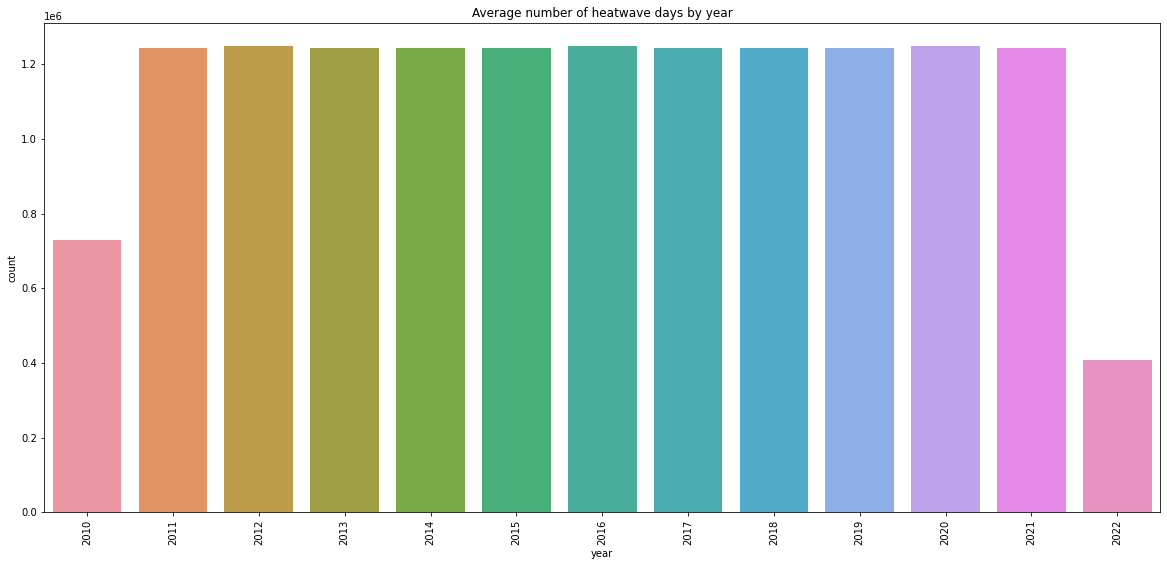

In [43]:
fig = plt.figure(figsize=(20,9))
sns.countplot(data=daegu, x='year')
plt.xticks(rotation=90)
plt.title('Average number of heatwave days by year')
plt.show()

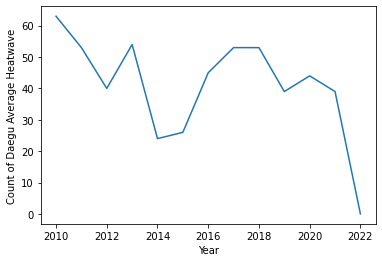

In [44]:
plt.plot(year_list,daegu_result)
plt.xlabel('Year')
plt.ylabel('Count of Daegu Average Heatwave')
plt.show()

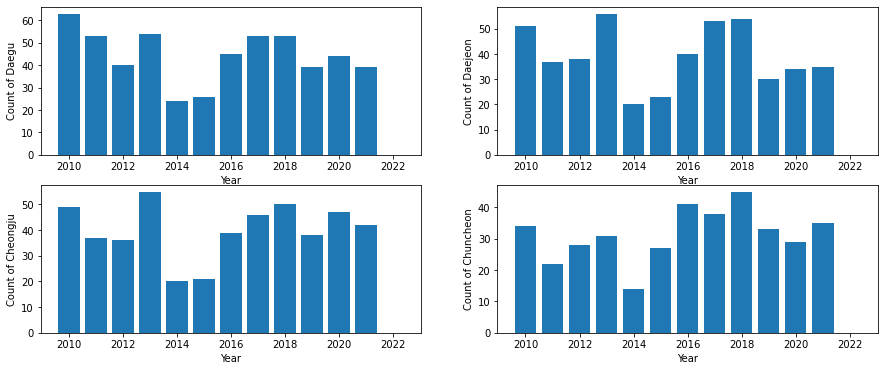

In [45]:
fig = plt.figure(figsize=(15,6))

plt.subplot(221)
plt.bar(year_list,daegu_result)
plt.xlabel('Year')
plt.ylabel('Count of Daegu')

plt.subplot(222)
plt.bar(year_list,daejeon_result)
plt.xlabel('Year')
plt.ylabel('Count of Daejeon')

plt.subplot(223)
plt.bar(year_list,cheongju_result)
plt.xlabel('Year')
plt.ylabel('Count of Cheongju')

plt.subplot(224)
plt.bar(year_list,chuncheon_result)
plt.xlabel('Year')
plt.ylabel('Count of Chuncheon')

plt.show()

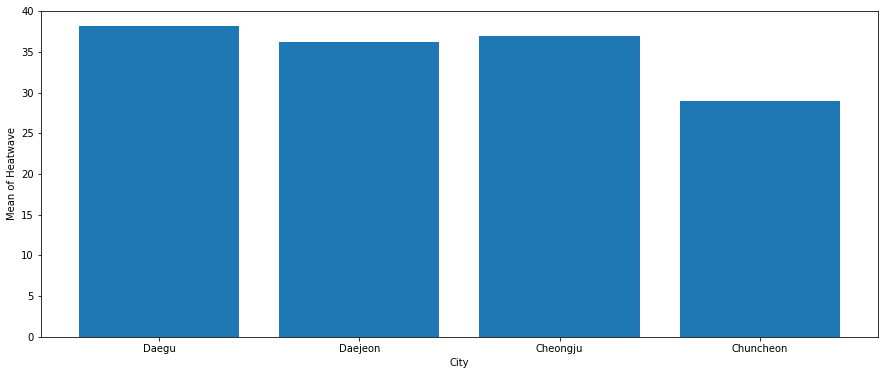

In [46]:
daejeon_mean = round(daejeon_mean,1)
cheongju_mean = round(cheongju_mean,1)

mean_list = [daegu_mean,daejeon_mean,cheongju_mean,chuncheon_mean]
city_list = ['Daegu','Daejeon','Cheongju','Chuncheon']

fig = plt.figure(figsize=(15,6))

plt.bar(city_list,mean_list)
plt.xlabel('City')
plt.ylabel('Mean of Heatwave')

plt.show()
